In [1]:
import numpy as np # linear algebra
import json
from matplotlib import pyplot as plt
from skimage import color
from skimage.feature import hog
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
import cv2  # importing cv
import imutils
import glob

#We need these in this file:
import load_read_name_extractor as lrne

In [2]:
def it_hog(img_list):
    hog_features = []
    for i in range (len(img_list)):
        img_list[i] = color.rgb2gray(img_list[i])
        fd, hog_image = hog(img_list[i], orientations=9, pixels_per_cell=(8, 8),
                        cells_per_block=(8, 8), visualize=True) #uses rbf kernel 
        
        #plt.axis("off")
        #plt.imshow(hog_image, cmap="gray")
        img_list[i] = hog_image
        hog_features.append(fd)
    return img_list, hog_features

In [3]:
iteration = "hog_cells_8x8_block_8x8"

In [4]:
img_list, names = lrne.load_name_and_img("cropped/*.jpeg")

In [5]:
xxx, hog_features = it_hog(img_list)

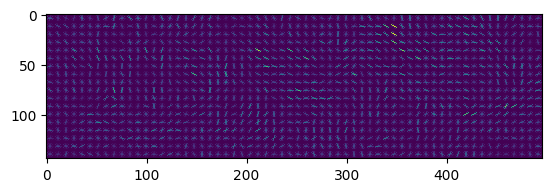

In [6]:
plt.imshow(xxx[0])

In [7]:

lrne.save_in_txt(names, "img_names_" + iteration)
lrne.save_in_txt(hog_features, "hog_features_" + iteration)

c:\Users\marti\miniconda3\envs\imgp2\lib\site-packages\numpy\lib\npyio.py:521: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [8]:
hog_features_load = np.load('hog_feutures.npy', allow_pickle=True)
names_load = np.load('img_names_hog.npy', allow_pickle=True)

In [9]:
names_load[0]

'cropped\\160607_Min_100.jpeg'